In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import os
import numpy as np
!pip install sk-video
import skvideo.io
os.chdir("/content/drive/MyDrive/Tensorflow Advance/Advance Computer Vision")

# For drawing onto the image.
import numpy as np
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

# For downloading the image.
import matplotlib.pyplot as plt
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO
import cv2

import imageio

In [16]:
def display_image(image):
  fig = plt.figure(figsize=(20, 15))
  plt.grid(False)
  plt.imshow(image)

def draw_bounding_box_on_image(image,
                               ymin,
                               xmin,
                               ymax,
                               xmax,
                               color,
                               font,
                               thickness=4,
                               display_str_list=()):
  draw = ImageDraw.Draw(image)
  im_width, im_height = image.size
  (left, right, top, bottom) = (xmin * im_width, xmax * im_width,
                                ymin * im_height, ymax * im_height)
  draw.line([(left, top), (left, bottom), (right, bottom), (right, top),
             (left, top)],
            width=thickness,
            fill=color)
  display_str_heights = [font.getsize(ds)[1] for ds in display_str_list]
  total_display_str_height = (1 + 2 * 0.05) * sum(display_str_heights)

  if top > total_display_str_height:
    text_bottom = top
  else:
    text_bottom = top + total_display_str_height
  # Reverse list and print from bottom to top.
  for display_str in display_str_list[::-1]:
    text_width, text_height = font.getsize(display_str)
    margin = np.ceil(0.05 * text_height)
    draw.rectangle([(left, text_bottom - text_height - 2 * margin),
                    (left + text_width, text_bottom)],
                   fill=color)
    draw.text((left + margin, text_bottom - text_height - margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -= text_height - 2 * margin


def draw_boxes(image, boxes, class_names, scores, max_boxes=10, min_score=0.1):
  """Overlay labeled boxes on an image with formatted scores and label names."""
  colors = list(ImageColor.colormap.values())

  try:
    font = ImageFont.truetype("/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Regular.ttf",25)
  except IOError:
    print("Font not found, using default font.")
    font = ImageFont.load_default()

  for i in range(min(boxes.shape[0], max_boxes)):
    if scores[i] >= min_score:
      ymin, xmin, ymax, xmax = tuple(boxes[i])
      display_str = "{}: {}%".format(class_names[i].decode("ascii"),
                                     int(100 * scores[i]))
      color = colors[hash(class_names[i]) % len(colors)]
      image_pil = Image.fromarray(np.uint8(image)).convert("RGB")
      draw_bounding_box_on_image(
          image_pil,
          ymin,
          xmin,
          ymax,
          xmax,
          color,
          font,
          display_str_list=[display_str])
      np.copyto(image, np.array(image_pil))
  return image

In [17]:
model_link = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"
detector   = hub.load(model_link).signatures['default']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [18]:
def predict(img_url , w=1400 , h=600 , display = True , max_box = 50):
    img = tf.image.convert_image_dtype(loaded_img , tf.float32)[tf.newaxis , ]
    print("Processing start....")
    result = detector(img)
    print("Processing done....")
    result = {k : v.numpy() for k , v in result.items()}
    box_img = draw_boxes(
        loaded_img.numpy() ,
        result['detection_boxes'] ,
        result['detection_class_entities'] ,
        result['detection_scores'] ,
        max_boxes=max_box
    )
    if display:
        display_image(box_img)
    else:
        return box_img

In [19]:
cap = cv2.VideoCapture("traffic.mp4")

In [6]:
frame = None
while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        break
    break
cap.release()

In [7]:
frame.shape

(360, 640, 3)

In [8]:
result = detector(tf.image.convert_image_dtype(frame , tf.float32)[tf.newaxis , ])

In [9]:
result = {k:v.numpy() for k , v in result.items()}

In [10]:
res = draw_boxes(frame , result['detection_boxes'] , result['detection_class_entities'] , result['detection_scores'] , max_boxes=20)

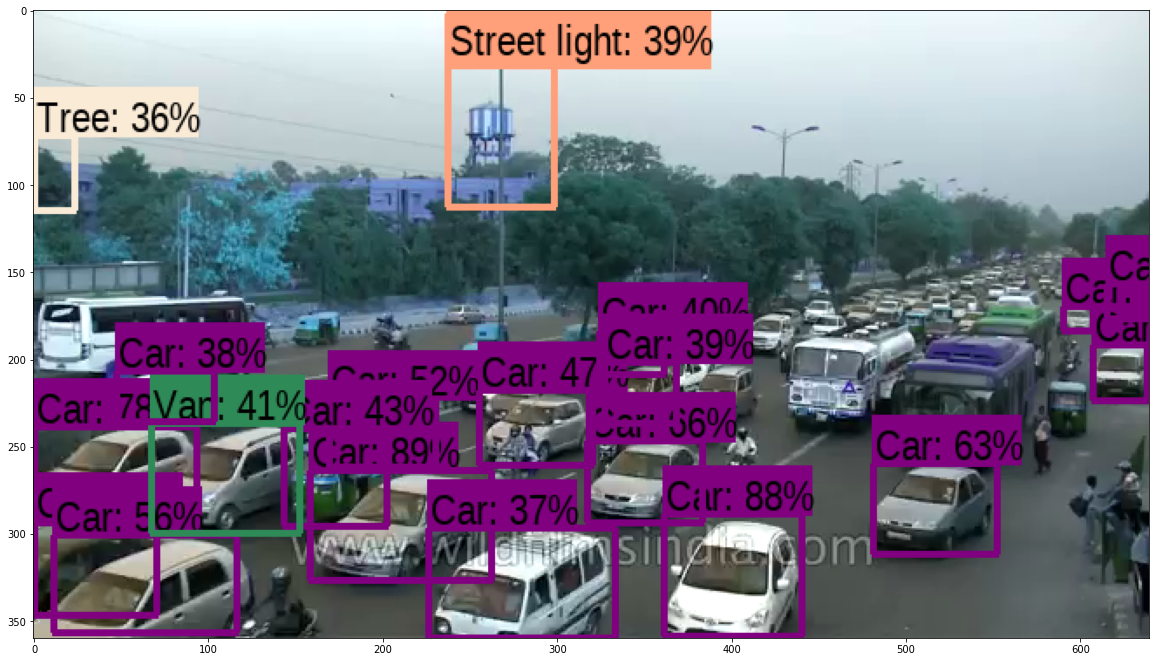

In [11]:
display_image(res)

In [30]:
im_name = "try"+str(1)+".png"
cv2.imwrite("images/"+im_name , res)

True

In [22]:
def real_time_detect(File_path , print_details = True):
    for i in os.listdir("images/"):
        os.remove("images/"+i)
    cap = cv2.VideoCapture(File_path)
    print("Process started ...")
    count = 0
    i     = 0
    frame = None
    while cap.isOpened():
        ret, frame = cap.read()
        if ret:
            result = detector(tf.image.convert_image_dtype(frame , tf.float32)[tf.newaxis , ])
            result = {k:v.numpy() for k , v in result.items()}
            res = draw_boxes(
                frame ,
                result['detection_boxes'] ,
                result['detection_class_entities'] ,
                result['detection_scores'] ,
                max_boxes=20
            )
            if count % 25 == 0:
                im_name = "try"+str(i)+".png"
                cv2.imwrite("images/"+im_name , res)
                i+=1
                print("%d images are Created ..."%count)
            count += 1
        else:
            break
    cap.release()
    print("Process done ......")
    print("Creating Video .........")
    
    img = []
    for i in os.listdir("images/"):
        img.append(cv2.imread("images/"+i))
    print("Total no of images : ",len(img))
    # Writes the the output image sequences in a video file
    

    imageio.mimsave('./animation_last.mp4' , img , fps = 1)
    print("Video creartion done ......")

In [23]:
%%time
File_path = "traffic.mp4"
real_time_detect(File_path)

1225 images are Created ...
1250 images are Created ...
1275 images are Created ...
1300 images are Created ...
1325 images are Created ...
1350 images are Created ...
1375 images are Created ...
1400 images are Created ...
1425 images are Created ...
1450 images are Created ...
1475 images are Created ...
1500 images are Created ...
1525 images are Created ...
1550 images are Created ...
1575 images are Created ...
1600 images are Created ...
1625 images are Created ...
1650 images are Created ...
1675 images are Created ...
1700 images are Created ...
1725 images are Created ...
1750 images are Created ...
1775 images are Created ...
1800 images are Created ...
1825 images are Created ...
1850 images are Created ...
1875 images are Created ...
1900 images are Created ...
1925 images are Created ...
1950 images are Created ...
1975 images are Created ...
2000 images are Created ...
2025 images are Created ...
2050 images are Created ...
2075 images are Created ...
2100 images are Crea

Video creartion done ......
CPU times: user 30min 40s, sys: 7min 30s, total: 38min 10s
Wall time: 45min 12s
